In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\heman\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
training_set = dataset_train.iloc[:,1:2].values

In [5]:
type(training_set)

numpy.ndarray

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

In [7]:
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
#taking 60 timestamps as learning values and predict the next output
X_train = []
y_train = []
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [10]:
len(training_set)

1258

In [11]:
#converting to numpy arrays from lists
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [13]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [14]:
#structure required for RNN
X_train = np.reshape(X_train,(X_train.shape[0] ,X_train.shape[1] , 1))

In [15]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [17]:
#initialising the RNN
regressor = Sequential()

In [18]:
regressor.add(LSTM(units = 50,return_sequences = True,input_shape =(X_train.shape[1] , 1)))

In [19]:
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(Dense(units = 1))

In [24]:
regressor.compile(optimizer ='rmsprop',loss = 'mean_squared_error')

In [25]:
regressor.fit(X_train,y_train,epochs=10,batch_size = 1)

Epoch 1/10
1198/1198 [==============================] - 77s 58ms/step - loss: 0.0119
Epoch 2/10
1198/1198 [==============================] - 66s 55ms/step - loss: 0.0061
Epoch 3/10
1198/1198 [==============================] - 78s 65ms/step - loss: 0.0050
Epoch 4/10
1198/1198 [==============================] - 76s 64ms/step - loss: 0.0045
Epoch 5/10
1198/1198 [==============================] - 74s 62ms/step - loss: 0.0038
Epoch 6/10
1198/1198 [==============================] - 72s 60ms/step - loss: 0.0035
Epoch 7/10
1198/1198 [==============================] - 69s 58ms/step - loss: 0.0034
Epoch 8/10
1198/1198 [==============================] - 67s 56ms/step - loss: 0.0032
Epoch 9/10
1198/1198 [==============================] - 70s 59ms/step - loss: 0.0028
Epoch 10/10
1198/1198 [==============================] - 68s 57ms/step - loss: 0.0025


In [26]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [28]:
#getting the predicted stock price of 2017
#we will concatenate the original dataset itself rather than the train or test set
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [29]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [30]:
inputs = dataset_total[len(dataset_total)- len(dataset_test) - 60 :].values

In [31]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [32]:
inputs = inputs.reshape(-1,1)

In [33]:
inputs = sc.transform(inputs)

In [34]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [35]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [ ]:
X_test = np.reshape(X_test,(X_test.shape[0] ,X_test.shape[1] , 1))

In [39]:
X_test[0]

array([0.9299055 , 0.93113327, 0.92750577, 0.94415507, 0.93876032,
       0.93403527, 0.93483518, 0.9313937 , 0.94636878, 0.96569685,
       0.97510976, 0.95966962, 0.97808617, 1.        , 0.98076494,
       0.97083116, 0.98450406, 0.96054394, 0.9371419 , 0.92841729,
       0.90804747, 0.8771858 , 0.92153434, 0.93809063, 0.93165414,
       0.95254483, 0.88812412, 0.88637547, 0.87032145, 0.88563137,
       0.90743359, 0.91571173, 0.89941588, 0.91805566, 0.9089404 ,
       0.9024853 , 0.89456061, 0.91600938, 0.9132934 , 0.88979835,
       0.86589404, 0.89030062, 0.90335962, 0.89642086, 0.91777662,
       0.93176576, 0.94114145, 0.95762334, 0.96413424, 0.96402262,
       0.96971501, 0.95077759, 0.96294367, 0.96123223, 0.95475854,
       0.95204256, 0.95163331, 0.95725128, 0.93796041, 0.93688146])

In [40]:
X_test[1]

array([0.93113327, 0.92750577, 0.94415507, 0.93876032, 0.93403527,
       0.93483518, 0.9313937 , 0.94636878, 0.96569685, 0.97510976,
       0.95966962, 0.97808617, 1.        , 0.98076494, 0.97083116,
       0.98450406, 0.96054394, 0.9371419 , 0.92841729, 0.90804747,
       0.8771858 , 0.92153434, 0.93809063, 0.93165414, 0.95254483,
       0.88812412, 0.88637547, 0.87032145, 0.88563137, 0.90743359,
       0.91571173, 0.89941588, 0.91805566, 0.9089404 , 0.9024853 ,
       0.89456061, 0.91600938, 0.9132934 , 0.88979835, 0.86589404,
       0.89030062, 0.90335962, 0.89642086, 0.91777662, 0.93176576,
       0.94114145, 0.95762334, 0.96413424, 0.96402262, 0.96971501,
       0.95077759, 0.96294367, 0.96123223, 0.95475854, 0.95204256,
       0.95163331, 0.95725128, 0.93796041, 0.93688146, 0.92955205])

In [45]:
predicted_stock_price = regressor.predict(X_test)

1/1 [==============================] - 0s 39ms/step


In [46]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [47]:
predicted_stock_price

array([[755.69965],
       [754.60767],
       [753.76495],
       [753.3204 ],
       [753.5406 ],
       [754.7435 ],
       [756.67914],
       [758.7252 ],
       [760.54034],
       [761.9954 ],
       [763.0555 ],
       [763.7205 ],
       [764.04486],
       [764.19763],
       [764.308  ],
       [764.92847],
       [766.3431 ],
       [768.5074 ],
       [770.8936 ],
       [772.44965]], dtype=float32)

Text(0.5, 1.0, 'google stock price prediction')

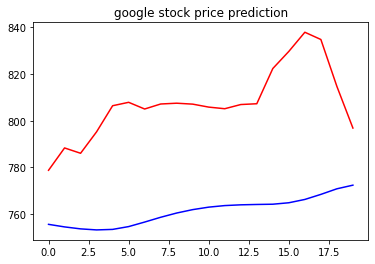

In [50]:
plt.plot(real_stock_price,color = 'red',label = 'Real google stock price')
plt.plot(predicted_stock_price,color = 'blue',label = 'predicted google stock price')
plt.title('google stock price prediction')